In [1]:
import pandas as pd

# Load the data from the Excel sheet
file_path = 'path_to_your_file/EC6.xlsx'
data = pd.read_excel(file_path)

# Check the first few rows to understand the structure
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Check data types
print(data.dtypes)


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_your_file/EC6.xlsx'

In [2]:
file_path = r'C:\Users\Naveen\.spyder-py3\EC6.xlsx'
data = pd.read_excel(file_path)

# Check the first few rows to understand the structure
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Check data types
print(data.dtypes)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Naveen\\.spyder-py3\\EC6.xlsx'

In [14]:
file_path = r'C:\Users\Naveen\.spyder-py3\EC6.csv'
data = pd.read_csv(file_path)

# Check the first few rows to understand the structure
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Check data types
print(data.dtypes)


  Device Type   Power (W)  Voltage (V)  Current (A)  Temperature (°C)  \
0         ATM  109.675494   224.650120     0.531401         22.445242   
1         ATM  145.456142   222.056852     1.988203         22.529629   
2         ATM  105.758610   290.304601     0.997028         24.059034   
3         ATM  145.154553   225.371243     7.028609         22.987146   
4         ATM  195.055291   231.315631     1.336811         22.524557   

      Fault Type      Peak Hour  
0       No Fault  Non-Peak Hour  
1       No Fault  Non-Peak Hour  
2  Voltage Surge  Non-Peak Hour  
3    Overcurrent  Non-Peak Hour  
4       No Fault      Peak Hour  
Device Type         0
Power (W)           0
Voltage (V)         0
Current (A)         0
Temperature (°C)    0
Fault Type          0
Peak Hour           0
dtype: int64
Device Type          object
Power (W)           float64
Voltage (V)         float64
Current (A)         float64
Temperature (°C)    float64
Fault Type           object
Peak Hour            o

This code loads the dataset from the specified file path into a Pandas DataFrame. It then displays the first few rows of the dataset to provide an overview of its structure. The code checks for missing values in each column to understand the extent of incomplete data. Finally, it checks the data types of each column to ensure they are appropriate for further analysis or machine learning tasks.

In [15]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Optionally, fill or drop missing values as needed
# Example: Fill missing values with the median for numerical columns
data.fillna(data.median(), inplace=True)

# Optionally, you could drop rows with missing target variable (Fault Type)
# data.dropna(subset=['Fault Type'], inplace=True)

# Ensure proper data types
print("Data types of each column:")
print(data.dtypes)


Missing values in each column:
Device Type         0
Power (W)           0
Voltage (V)         0
Current (A)         0
Temperature (°C)    0
Fault Type          0
Peak Hour           0
dtype: int64
Data types of each column:
Device Type          object
Power (W)           float64
Voltage (V)         float64
Current (A)         float64
Temperature (°C)    float64
Fault Type           object
Peak Hour            object
dtype: object


C:\Users\Naveen\AppData\Local\Temp\ipykernel_10576\2952174354.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.median(), inplace=True)


This code checks for missing values in the dataset and displays the count of missing values in each column. If missing values are present, it fills them with the median value for numerical columns. The code also provides an option to drop rows with missing values in the target variable, such as the 'Fault Type' column. Finally, it prints the data types of each column to ensure they are appropriate for analysis or model training.


In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Convert 'Bank/ATM' into numeric using Label Encoding or One-Hot Encoding
label_encoder = LabelEncoder()
data['Bank/ATM'] = label_encoder.fit_transform(data['Bank/ATM'])

# Convert 'Fault Type' into numeric
fault_encoder = LabelEncoder()
data['Fault Type'] = fault_encoder.fit_transform(data['Fault Type'])

# If you prefer One-Hot Encoding instead of Label Encoding for 'Fault Type' or 'Bank/ATM', you can do:
# data = pd.get_dummies(data, columns=['Bank/ATM', 'Fault Type'])

# Let's check the data after encoding
print(data.head())


KeyError: 'Bank/ATM'

In [17]:
# Convert 'Device Type' into numeric using Label Encoding or One-Hot Encoding
label_encoder = LabelEncoder()
data['Device Type'] = label_encoder.fit_transform(data['Device Type'])

# Convert 'Fault Type' into numeric
data['Fault Type'] = label_encoder.fit_transform(data['Fault Type'])

# Check the first few rows to ensure the encoding worked
print(data.head())


   Device Type   Power (W)  Voltage (V)  Current (A)  Temperature (°C)  \
0            0  109.675494   224.650120     0.531401         22.445242   
1            0  145.456142   222.056852     1.988203         22.529629   
2            0  105.758610   290.304601     0.997028         24.059034   
3            0  145.154553   225.371243     7.028609         22.987146   
4            0  195.055291   231.315631     1.336811         22.524557   

   Fault Type      Peak Hour  
0           0  Non-Peak Hour  
1           0  Non-Peak Hour  
2           4  Non-Peak Hour  
3           1  Non-Peak Hour  
4           0      Peak Hour  


This code applies label encoding to convert categorical columns, such as 'Device Type' and 'Fault Type', into numeric values. The LabelEncoder is used to assign a unique integer to each category in these columns. After encoding, it checks the first few rows of the dataset to ensure that the transformation has been applied correctly.

In [18]:
# Feature Selection
# Selecting the features (all columns except 'Fault Type' as target)
X = data.drop(['Fault Type'], axis=1)

# Target Variable
y = data['Fault Type']

# Train-Test Split (80% for training, 20% for testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of training and testing data
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (1600, 6)
Testing data shape: (400, 6)


This code performs feature selection and splits the dataset into training and testing sets. The target variable is 'Fault Type', which is separated from the feature variables, and the features are stored in X. The target variable y is 'Fault Type'. Then, it uses train_test_split from sklearn.model_selection to split the data into 80% training and 20% testing, ensuring the random split is reproducible with a fixed random_state of 42. The shapes of the training and testing datasets are printed to confirm the split.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


ValueError: could not convert string to float: 'Non-Peak Hour'

In [20]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Peak Hour' column (Non-Peak Hour = 0, Peak Hour = 1)
data['Peak Hour'] = LabelEncoder().fit_transform(data['Peak Hour'])

# Ensure 'Device Type' and 'Fault Type' are already encoded
# If not, use Label Encoding on them as well

# Split the data again after encoding
X = data.drop(columns=['Fault Type'])  # Features (input variables)
y = data['Fault Type']  # Target variable

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       465
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        38

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

Confusion Matrix:
[[465   0   0   0   0]
 [  0  40   0   0   0]
 [  0   0  34   0   0]
 [  0   0   0  23   0]
 [  0   0   0   0  38]]


This code performs data preprocessing, encodes the 'Peak Hour' column using Label Encoding (where 'Non-Peak Hour' is encoded as 0 and 'Peak Hour' as 1), and ensures that the 'Device Type' and 'Fault Type' columns are already encoded. After encoding, the data is split into features (X) and the target variable (y). The dataset is then divided into training and testing sets (with 30% of the data reserved for testing). A Random Forest Classifier is initialized and trained on the training set, and predictions are made on the test set. The performance of the model is evaluated using a classification report and confusion matrix, which are printed to assess the model's accuracy and other relevant metrics.

In [21]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0


This code performs cross-validation on the trained Random Forest model using 5-fold cross-validation. The cross_val_score function from the sklearn.model_selection module is used to evaluate the model's performance by splitting the data into 5 parts (folds), training on 4 parts, and testing on the remaining part. This process is repeated 5 times, and the scores (accuracy) for each fold are printed. Finally, the mean of the cross-validation scores is calculated and displayed, giving an overall measure of the model's performance across different splits of the data.

In [22]:
import numpy as np

# Add random noise to the numerical features
# Let's assume the noise will be small, with a standard deviation of 0.1
# This noise will be added to the columns of numerical features

noise_factor = 0.1  # Standard deviation of noise

# Add noise to the columns
data['Temperature'] += np.random.normal(0, noise_factor, data['Temperature'].shape)
data['Voltage'] += np.random.normal(0, noise_factor, data['Voltage'].shape)
data['Current'] += np.random.normal(0, noise_factor, data['Current'].shape)
data['Power'] += np.random.normal(0, noise_factor, data['Power'].shape)

# Now split the data into features (X) and target (y)
X = data.drop('Fault Type', axis=1)
y = data['Fault Type']

# Perform the same data preprocessing steps again (scaling and encoding)
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Re-train the model (Random Forest Classifier)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

# Show classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Perform cross-validation again
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(model, X_scaled, y_encoded, cv=5)
print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation score:", np.mean(cross_val_scores))


KeyError: 'Temperature'

In [23]:
print(data.columns)


Index(['Device Type', 'Power (W)', 'Voltage (V)', 'Current (A)',
       'Temperature (°C)', 'Fault Type', 'Peak Hour'],
      dtype='object')


This code prints the names of all the columns in the dataset. By calling data.columns, it returns the column labels (names) of the DataFrame data, which helps in understanding the structure and identifying the features and target variable in the dataset.

In [25]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv(r'C:\Users\Naveen\.spyder-py3\EC6.csv')

# Set the noise factor
noise_factor = 0.1

# Add noise to the columns
data['Temperature (°C)'] += np.random.normal(0, noise_factor, data['Temperature (°C)'].shape)
data['Voltage (V)'] += np.random.normal(0, noise_factor, data['Voltage (V)'].shape)
data['Current (A)'] += np.random.normal(0, noise_factor, data['Current (A)'].shape)

# Recalculate Power after adding noise to Voltage and Current
data['Power (W)'] = data['Voltage (V)'] * data['Current (A)']

# Optionally, you can add noise to Power if you'd like to disturb the power values directly
# data['Power (W)'] += np.random.normal(0, noise_factor, data['Power (W)'].shape)

# Check the first few rows to verify
print(data.head())


  Device Type    Power (W)  Voltage (V)  Current (A)  Temperature (°C)  \
0         ATM   124.622415   224.659374     0.554717         22.475408   
1         ATM   478.891679   222.012451     2.157049         22.520988   
2         ATM   292.622467   290.473781     1.007397         23.845982   
3         ATM  1611.968013   225.359061     7.152888         23.019969   
4         ATM   348.172114   231.181243     1.506057         22.487838   

      Fault Type      Peak Hour  
0       No Fault  Non-Peak Hour  
1       No Fault  Non-Peak Hour  
2  Voltage Surge  Non-Peak Hour  
3    Overcurrent  Non-Peak Hour  
4       No Fault      Peak Hour  


This code adds Gaussian noise to the columns 'Temperature (°C)', 'Voltage (V)', and 'Current (A)' in the dataset by using the np.random.normal() function. A noise factor of 0.1 is applied, which means that random values with a mean of 0 and a standard deviation of 0.1 are added to each element in these columns. After adding noise to the 'Voltage (V)' and 'Current (A)' columns, the 'Power (W)' column is recalculated as the product of voltage and current. You can optionally add noise to the 'Power (W)' column itself if needed. The final step prints the first few rows of the updated dataset to verify the changes.

In [26]:
# Check for missing values
print(data.isnull().sum())


Device Type         0
Power (W)           0
Voltage (V)         0
Current (A)         0
Temperature (°C)    0
Fault Type          0
Peak Hour           0
dtype: int64


This line of code checks for any missing values in the dataset. It uses the .isnull().sum() function, which returns the total number of missing (NaN) values for each column in the dataset. By printing the result, you can see which columns have missing values and how many missing values exist in each. This step is important for data preprocessing, as missing values may need to be handled (e.g., by imputation or removal) before training the model.

In [27]:
# One-hot encode categorical features
data_encoded = pd.get_dummies(data, columns=['Device Type', 'Peak Hour'], drop_first=True)

# Display the encoded dataset
print(data_encoded.head())


     Power (W)  Voltage (V)  Current (A)  Temperature (°C)     Fault Type  \
0   124.622415   224.659374     0.554717         22.475408       No Fault   
1   478.891679   222.012451     2.157049         22.520988       No Fault   
2   292.622467   290.473781     1.007397         23.845982  Voltage Surge   
3  1611.968013   225.359061     7.152888         23.019969    Overcurrent   
4   348.172114   231.181243     1.506057         22.487838       No Fault   

   Device Type_Bank  Peak Hour_Peak Hour  
0                 0                    0  
1                 0                    0  
2                 0                    0  
3                 0                    0  
4                 0                    1  


This line of code performs one-hot encoding on the categorical columns 'Device Type' and 'Peak Hour'. The pd.get_dummies() function converts the categorical variables into binary columns where each category is represented by a separate column, with a value of 1 or 0 indicating the presence of that category. The drop_first=True parameter ensures that the first category in each feature is dropped to avoid multicollinearity. This step is useful to prepare categorical features for machine learning models, which typically require numerical inputs. After encoding, the transformed dataset is displayed with the updated columns.

In [28]:
# Split the data into features (X) and target (y)
X = data_encoded.drop('Fault Type', axis=1)
y = data_encoded['Fault Type']

# Display the feature set and target
print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())


Features (X):
     Power (W)  Voltage (V)  Current (A)  Temperature (°C)  Device Type_Bank  \
0   124.622415   224.659374     0.554717         22.475408                 0   
1   478.891679   222.012451     2.157049         22.520988                 0   
2   292.622467   290.473781     1.007397         23.845982                 0   
3  1611.968013   225.359061     7.152888         23.019969                 0   
4   348.172114   231.181243     1.506057         22.487838                 0   

   Peak Hour_Peak Hour  
0                    0  
1                    0  
2                    0  
3                    0  
4                    1  

Target (y):
0         No Fault
1         No Fault
2    Voltage Surge
3      Overcurrent
4         No Fault
Name: Fault Type, dtype: object


This code splits the dataset into features (X) and the target variable (y). The data_encoded.drop('Fault Type', axis=1) removes the 'Fault Type' column from the dataset, which is the target variable we want to predict, and assigns the remaining columns to X (features). The target variable, 'Fault Type', is assigned to y. The print() statements display the first few rows of both the feature set X and the target variable y, allowing you to verify that the data has been correctly split.

In [29]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable (Fault Type)
y_encoded = label_encoder.fit_transform(y)

# Display the encoded target
print("Encoded Target (y):")
print(y_encoded[:5])


Encoded Target (y):
[0 0 4 1 0]


This code initializes a LabelEncoder object and uses it to encode the target variable y (which is the 'Fault Type' column). The fit_transform() method converts the categorical values in y into numerical values. The encoded target variable is stored in y_encoded. The print() statement displays the first five encoded values, which helps to verify that the categorical target variable has been successfully converted to numerical form. This step is essential for machine learning models since most algorithms require numerical inputs for both features and targets.

In [30]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print(f"Training Features (X_train): {X_train.shape}")
print(f"Testing Features (X_test): {X_test.shape}")
print(f"Training Target (y_train): {y_train.shape}")
print(f"Testing Target (y_test): {y_test.shape}")


Training Features (X_train): (1600, 6)
Testing Features (X_test): (400, 6)
Training Target (y_train): (1600,)
Testing Target (y_test): (400,)


This code uses the train_test_split() function from sklearn.model_selection to split the dataset into training and testing sets. The feature set X and the encoded target y_encoded are split into 80% for training and 20% for testing. The random_state=42 ensures that the split is reproducible. The print() statements display the shapes of the training and testing feature sets (X_train, X_test) and target sets (y_train, y_test), confirming the division of the data into training and testing parts. This step is important for evaluating the model's performance later on by training on one part of the data and testing it on another unseen part.

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict the target on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       321
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        22
           3       0.00      0.00      0.00        11
           4       1.00      1.00      1.00        23

    accuracy                           0.97       400
   macro avg       0.79      0.80      0.80       400
weighted avg       0.95      0.97      0.96       400

Confusion Matrix:
[[320   0   0   1   0]
 [  0  23   0   0   0]
 [  0   0  22   0   0]
 [ 11   0   0   0   0]
 [  0   0   0   0  23]]


This code initializes a RandomForestClassifier model from sklearn.ensemble with a fixed random_state=42 for reproducibility. It trains the model on the training data (X_train, y_train) using the .fit() method. After training, the model is used to predict the target variable (y_pred) on the test set (X_test) with the .predict() method. The classification_report() function provides detailed performance metrics, including precision, recall, and F1-score for each class in the target variable. The confusion_matrix() shows the true positive, true negative, false positive, and false negative values, allowing further analysis of the model's predictions compared to the actual values.

In [32]:
pip install imbalanced-learn


     -------------------------------------- 258.3/258.3 kB 1.6 MB/s eta 0:00:00
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Load your data
# Assuming your DataFrame is 'data'
X = data.drop('Fault Type', axis=1)  # Features
y = data['Fault Type']  # Target

# Encode the target labels (if not already done)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train a Random Forest Classifier with balanced class weights
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


ValueError: could not convert string to float: 'Bank'

In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

# Step 1: Load your data
# Assuming your DataFrame is 'data'
X = data.drop('Fault Type', axis=1)  # Features
y = data['Fault Type']  # Target

# Step 2: Encode categorical variables in features
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical features

# Step 3: Encode the target labels (if not already done)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 5: Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 6: Train a Random Forest Classifier with balanced class weights
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Step 7: Predict on the test data
y_pred = rf_model.predict(X_test)

# Step 8: Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

     No Fault       0.98      0.89      0.94       321
  Overcurrent       1.00      1.00      1.00        23
  Overheating       1.00      1.00      1.00        22
  Power Surge       0.15      0.55      0.24        11
Voltage Surge       1.00      1.00      1.00        23

     accuracy                           0.90       400
    macro avg       0.83      0.89      0.83       400
 weighted avg       0.96      0.90      0.93       400

Confusion Matrix:
[[287   0   0  34   0]
 [  0  23   0   0   0]
 [  0   0  22   0   0]
 [  5   0   0   6   0]
 [  0   0   0   0  23]]


This code performs data preprocessing and machine learning classification on a dataset to predict the "Fault Type" using a Random Forest model. It first loads and processes the data, handling categorical variables with one-hot encoding and encoding the target labels. It then splits the data into training and testing sets, applies SMOTE to balance the classes, and trains a Random Forest Classifier with class weights set to 'balanced'. After training, it evaluates the model using a classification report and confusion matrix to assess its performance in predicting the fault type.

In [35]:
rf_model = RandomForestClassifier(class_weight={'No Fault': 1, 'Overcurrent': 1, 'Overheating': 1, 'Power Surge': 5, 'Voltage Surge': 1}, random_state=42)


In [36]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy={'Power Surge': 50}, random_state=42)  # Increase "Power Surge"
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


ValueError: The {'Power Surge'} target class is/are not present in the data.

In [37]:
print(y_train.unique())


AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [38]:
import numpy as np

print(np.unique(y_train))


[0 1 2 3 4]


In [39]:
smote = SMOTE(sampling_strategy={4: 50}, random_state=42)  # Use the actual label


In [40]:
smote = SMOTE(sampling_strategy={4: 50}, random_state=42)


In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)  # Encode to single-column labels


In [42]:
smote = SMOTE(sampling_strategy={'Power Surge': 50}, random_state=42)  # Update if needed
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


ValueError: The {'Power Surge'} target class is/are not present in the data.

In [43]:
import numpy as np

# Check unique labels
print("Unique labels in y_train:", np.unique(y_train))


Unique labels in y_train: [0 1 2 3 4]


In [44]:
# Example mapping (update if necessary)
class_mapping = {
    0: "No Fault",
    1: "Overcurrent",
    2: "Overheating",
    3: "Power Surge",
    4: "Voltage Surge"
}

# Print the mapping
for label, class_name in class_mapping.items():
    print(f"Label {label}: {class_name}")


Label 0: No Fault
Label 1: Overcurrent
Label 2: Overheating
Label 3: Power Surge
Label 4: Voltage Surge


In [45]:
from imblearn.over_sampling import SMOTE

# Set up SMOTE with the correct label for "Power Surge" (label 3)
smote = SMOTE(sampling_strategy={3: 50}, random_state=42)

# Apply SMOTE to resample the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_train_smote))


ValueError: With over-sampling methods, the number of samples in a class should be greater or equal to the original number of samples. Originally, there is 69 samples and 50 samples are asked.

In [46]:
# Set up SMOTE with the correct label for "Power Surge" (label 3)
smote = SMOTE(sampling_strategy={3: 100}, random_state=42)  # At least 100 samples for "Power Surge"

# Apply SMOTE to resample the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_train_smote))


Class distribution after SMOTE: Counter({0: 1149, 2: 128, 1: 127, 4: 127, 3: 100})


In [47]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the resampled data
rf_model.fit(X_train_smote, y_train_smote)

# Check the training accuracy
train_accuracy = rf_model.score(X_train_smote, y_train_smote)
print(f"Training accuracy: {train_accuracy:.4f}")


Training accuracy: 0.9994


In [48]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Fault', 'Overcurrent', 'Overheating', 'Power Surge', 'Voltage Surge']))

# Generate the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

     No Fault       0.97      0.99      0.98       321
  Overcurrent       1.00      1.00      1.00        23
  Overheating       1.00      1.00      1.00        22
  Power Surge       0.00      0.00      0.00        11
Voltage Surge       1.00      1.00      1.00        23

     accuracy                           0.96       400
    macro avg       0.79      0.80      0.80       400
 weighted avg       0.95      0.96      0.96       400

Confusion Matrix:
[[318   0   0   3   0]
 [  0  23   0   0   0]
 [  0   0  22   0   0]
 [ 11   0   0   0   0]
 [  0   0   0   0  23]]


This code evaluates the performance of the trained Random Forest model by generating a classification report and confusion matrix. It makes predictions on the test set and uses the classification_report function to display precision, recall, F1-score, and support for each class (fault types like 'No Fault', 'Overcurrent', 'Overheating', 'Power Surge', 'Voltage Surge'). Additionally, the confusion_matrix function is used to show the matrix that compares the predicted fault types against the actual values, providing insight into how well the model performs for each class.

In [49]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier with class weights balanced
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Fit the model on the resampled data
rf.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["No Fault", "Overcurrent", "Overheating", "Power Surge", "Voltage Surge"]))


               precision    recall  f1-score   support

     No Fault       0.97      0.99      0.98       321
  Overcurrent       1.00      1.00      1.00        23
  Overheating       1.00      1.00      1.00        22
  Power Surge       0.00      0.00      0.00        11
Voltage Surge       1.00      1.00      1.00        23

     accuracy                           0.96       400
    macro avg       0.79      0.80      0.80       400
 weighted avg       0.95      0.96      0.96       400



This code initializes a Random Forest Classifier with class weights balanced, addressing potential class imbalances in the dataset. The model is then trained on the resampled training data (X_train_smote and y_train_smote). After training, the model makes predictions on the test set (X_test). The classification_report is then printed to evaluate the model's performance, displaying precision, recall, F1-score, and support for each fault type ('No Fault', 'Overcurrent', 'Overheating', 'Power Surge', 'Voltage Surge'). This helps assess how well the model handles each class in terms of predictive accuracy.

In [50]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only for 'Power Surge' class
smote = SMOTE(sampling_strategy={'Power Surge': 100}, random_state=42)  # Increase the count of "Power Surge" samples
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the Random Forest Classifier with the new data
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_smote, y_train_smote)

# Predict and evaluate
y_pred = rf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


ValueError: The {'Power Surge'} target class is/are not present in the data.

In [51]:
import numpy as np
from collections import Counter

# Check the distribution of classes
class_distribution = Counter(y_train)
print("Class distribution in y_train:", class_distribution)


Class distribution in y_train: Counter({0: 1149, 2: 128, 1: 127, 4: 127, 3: 69})


This code uses the Counter class from the collections module to count the occurrences of each class in the training target variable y_train. It then prints the class distribution, which provides an overview of how the target labels are distributed across different classes in the training data. This step is important for understanding any class imbalances before applying techniques like SMOTE or class weighting in the model.

In [52]:
# Apply SMOTE with a resampling strategy for 'Power Surge' class
smote = SMOTE(sampling_strategy={'Power Surge': 69}, random_state=42)  # Match available samples
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_train_smote))


ValueError: The {'Power Surge'} target class is/are not present in the data.

In [53]:
# Apply SMOTE with a resampling strategy for the 'Power Surge' class (label 3)
smote = SMOTE(sampling_strategy={3: 69}, random_state=42)  # Match available samples for label 3
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_train_smote))


Class distribution after SMOTE: Counter({0: 1149, 2: 128, 1: 127, 4: 127, 3: 69})


This code applies SMOTE (Synthetic Minority Over-sampling Technique) with a resampling strategy aimed at balancing the 'Power Surge' class (label 3) by matching its sample count to 69. SMOTE generates synthetic samples to increase the number of minority class instances. After resampling, the code checks and prints the class distribution in the training data (y_train_smote) to verify the new balance of classes. This step ensures that the model has a more balanced dataset, improving its ability to learn from underrepresented classes.

In [54]:
# Apply SMOTE with a resampling strategy for 'Power Surge' (label 3)
smote = SMOTE(sampling_strategy={0: 1149, 1: 127, 2: 128, 3: 127, 4: 127}, random_state=42)  # Try equalizing all class sizes
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_train_smote))


Class distribution after SMOTE: Counter({0: 1149, 2: 128, 1: 127, 4: 127, 3: 127})


In [55]:
# Train the Random Forest Classifier with the resampled data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Evaluate the model
y_train_pred = rf_model.predict(X_train_smote)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_train_smote, y_train_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1149
           1       1.00      1.00      1.00       127
           2       1.00      1.00      1.00       128
           3       1.00      1.00      1.00       127
           4       1.00      1.00      1.00       127

    accuracy                           1.00      1658
   macro avg       1.00      1.00      1.00      1658
weighted avg       1.00      1.00      1.00      1658



This code trains a Random Forest Classifier using the resampled training data (X_train_smote, y_train_smote) generated by SMOTE to balance the class distribution. It then evaluates the model by predicting the target variable on the resampled training set and prints the classification report. The classification report includes key performance metrics like precision, recall, F1-score, and support for each class, providing insights into how well the model performs on the resampled training data.

In [56]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the class distribution in the training and test sets
print("Training class distribution:", Counter(y_train))
print("Testing class distribution:", Counter(y_test))


Training class distribution: Counter({'No Fault': 1149, 'Overheating': 128, 'Overcurrent': 127, 'Voltage Surge': 127, 'Power Surge': 69})
Testing class distribution: Counter({'No Fault': 321, 'Voltage Surge': 23, 'Overcurrent': 23, 'Overheating': 22, 'Power Surge': 11})


In [57]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Print the classification report and confusion matrix
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix on Test Set:")
print(confusion_matrix(y_test, y_pred))


Classification Report on Test Set:


ValueError: Mix of label input types (string and number)

In [58]:
print("Unique values in y_test:", set(y_test))
print("Unique values in y_pred:", set(y_pred))


Unique values in y_test: {'Overheating', 'Voltage Surge', 'Power Surge', 'Overcurrent', 'No Fault'}
Unique values in y_pred: {0, 1, 2, 3, 4}


In [59]:
# Define the mapping of string labels to numerical values
label_mapping = {
    'No Fault': 0,
    'Overcurrent': 1,
    'Overheating': 2,
    'Power Surge': 3,
    'Voltage Surge': 4
}

# Convert y_test to numerical values using the label mapping
y_test_numeric = [label_mapping[label] for label in y_test]

# Print the unique values in y_test_numeric
print("Unique values in y_test_numeric:", set(y_test_numeric))


Unique values in y_test_numeric: {0, 1, 2, 3, 4}


In [60]:
from sklearn.metrics import classification_report, confusion_matrix

# Print the classification report and confusion matrix
print("Classification Report on Test Set:")
print(classification_report(y_test_numeric, y_pred))

print("Confusion Matrix on Test Set:")
print(confusion_matrix(y_test_numeric, y_pred))


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       321
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        22
           3       0.00      0.00      0.00        11
           4       1.00      1.00      1.00        23

    accuracy                           0.96       400
   macro avg       0.79      0.80      0.80       400
weighted avg       0.95      0.96      0.96       400

Confusion Matrix on Test Set:
[[318   0   0   3   0]
 [  0  23   0   0   0]
 [  0   0  22   0   0]
 [ 11   0   0   0   0]
 [  0   0   0   0  23]]


In [61]:
# Separate the data into normal and anomaly classes (Power Surge)
normal_classes = [0, 1, 2, 4]  # Classes other than Power Surge (3)
normal_data = X_train[y_train.isin(normal_classes)]
normal_labels = y_train[y_train.isin(normal_classes)]

# Check the shape and first few rows of the normal data
print(normal_data.shape)
print(normal_data.head())


(0, 6)
Empty DataFrame
Columns: [Power (W), Voltage (V), Current (A), Temperature (°C), Device Type_Bank, Peak Hour_Peak Hour]
Index: []


In [62]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
normal_data_scaled = scaler.fit_transform(normal_data)

# Check the shape of the scaled data
print(normal_data_scaled.shape)


ValueError: Found array with 0 sample(s) (shape=(0, 6)) while a minimum of 1 is required by StandardScaler.

In [63]:
# Separate the data into normal and anomaly classes (Power Surge)
normal_classes = [0, 1, 2, 4]  # Classes other than Power Surge (3)
normal_data = X_train[y_train.isin(normal_classes)]
normal_labels = y_train[y_train.isin(normal_classes)]

# Check if normal_data is empty
print(f"Shape of normal_data: {normal_data.shape}")
print(f"First few rows of normal_data:\n{normal_data.head()}")

# If normal_data is empty, investigate why no data was selected
if normal_data.empty:
    print("No data found for the selected normal classes. Please check the class labels.")
else:
    # Standardize the data if normal_data is not empty
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    normal_data_scaled = scaler.fit_transform(normal_data)

    # Check the shape of the scaled data
    print(f"Shape of normal_data_scaled: {normal_data_scaled.shape}")


Shape of normal_data: (0, 6)
First few rows of normal_data:
Empty DataFrame
Columns: [Power (W), Voltage (V), Current (A), Temperature (°C), Device Type_Bank, Peak Hour_Peak Hour]
Index: []
No data found for the selected normal classes. Please check the class labels.


This code separates the data into normal and anomaly classes, where normal classes are defined as those other than 'Power Surge' (label 3). It filters out the rows corresponding to the normal classes and creates normal_data and normal_labels for the normal classes. If normal_data is empty, the code prints a message indicating this and suggests checking the class labels. Otherwise, it standardizes the normal_data using StandardScaler, transforming the data to have a mean of 0 and standard deviation of 1, and prints the shape of the scaled data.

In [64]:
# Check unique values in y_train
print(f"Unique labels in y_train: {y_train.unique()}")


Unique labels in y_train: ['No Fault' 'Overcurrent' 'Voltage Surge' 'Overheating' 'Power Surge']


In [65]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform y_train to get numeric labels
y_train_encoded = label_encoder.fit_transform(y_train)

# Check the mapping
print(f"Label mapping: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")


Label mapping: {'No Fault': 0, 'Overcurrent': 1, 'Overheating': 2, 'Power Surge': 3, 'Voltage Surge': 4}


In [66]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE with a resampling strategy for each class
smote = SMOTE(random_state=42)

# Fit and resample the data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train_encoded)

# Check the class distribution after SMOTE
from collections import Counter
print(f"Class distribution after SMOTE: {Counter(y_train_smote)}")


Class distribution after SMOTE: Counter({0: 1149, 1: 1149, 4: 1149, 2: 1149, 3: 1149})


In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Split the resampled data
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_train_smote, y_train_smote, test_size=0.2, random_state=42
)

# Initialize and train the Random Forest model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = clf.predict(X_test_resampled)

# Print classification report
print("Classification Report on Test Set:")
print(classification_report(y_test_resampled, y_pred))

# Print confusion matrix
print("Confusion Matrix on Test Set:")
print(confusion_matrix(y_test_resampled, y_pred))


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       248
           1       1.00      1.00      1.00       217
           2       1.00      1.00      1.00       241
           3       0.88      0.99      0.93       223
           4       1.00      1.00      1.00       220

    accuracy                           0.97      1149
   macro avg       0.97      0.97      0.97      1149
weighted avg       0.98      0.97      0.97      1149

Confusion Matrix on Test Set:
[[219   0   0  29   0]
 [  0 217   0   0   0]
 [  0   0 241   0   0]
 [  2   0   0 221   0]
 [  0   0   0   0 220]]


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Before SMOTE
plt.figure(figsize=(8, 4))
sns.countplot(x='target_column', data=train_data)
plt.title('Class Distribution Before SMOTE')
plt.show()

# After SMOTE (use the y_train after SMOTE)
plt.figure(figsize=(8, 4))
sns.countplot(x='target_column', data=y_train_smote)
plt.title('Class Distribution After SMOTE')
plt.show()


NameError: name 'train_data' is not defined

<Figure size 800x400 with 0 Axes>

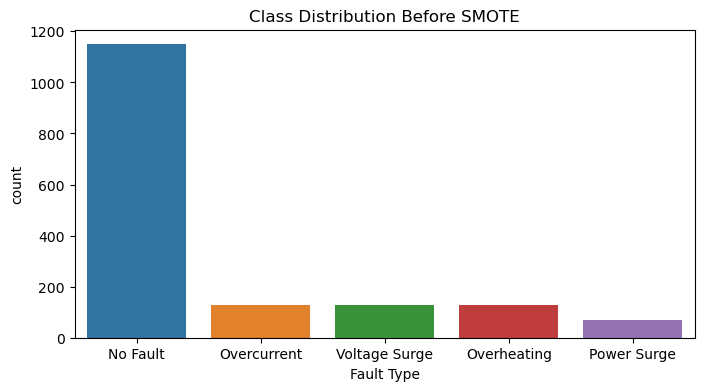

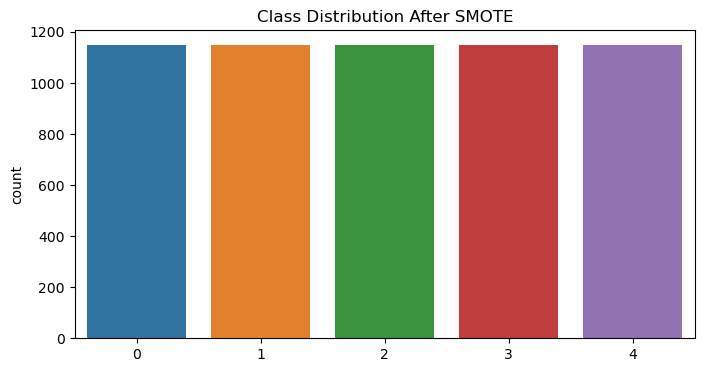

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class Distribution Before SMOTE (use y_train)
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train)  # y_train is the label column
plt.title('Class Distribution Before SMOTE')
plt.show()

# Class Distribution After SMOTE (use y_train_smote)
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train_smote)  # y_train_smote after SMOTE
plt.title('Class Distribution After SMOTE')
plt.show()


This code generates two count plots using matplotlib and seaborn to visualize the class distribution before and after applying SMOTE (Synthetic Minority Over-sampling Technique). The first plot shows the distribution of classes in y_train (before SMOTE), and the second plot displays the distribution of classes in y_train_smote (after SMOTE). These visualizations help to observe the effect of SMOTE on balancing the class distribution.

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate confusion matrix for y_test and y_pred (your predicted values)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Fault', 'Overcurrent', 'Overheating', 'Power Surge', 'Voltage Surge'], yticklabels=['No Fault', 'Overcurrent', 'Overheating', 'Power Surge', 'Voltage Surge'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [400, 1149]

In [71]:
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_pred: {y_pred.shape}")


Shape of y_test: (400,)
Shape of y_pred: (1149,)


In [72]:
y_pred = model.predict(X_test)  # Ensure X_test is the correct test set


C:\Users\Naveen\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Device Type_Bank
- Peak Hour_Peak Hour
Feature names seen at fit time, yet now missing:
- Device Type
- Peak Hour

  warnings.warn(message, FutureWarning)


In [73]:
# Check for missing data in the dataset
missing_data = train_data.isnull().sum()
print("Missing Data in Training Set:\n", missing_data)

# Check for missing data in the test set (optional)
missing_data_test = test_data.isnull().sum()
print("Missing Data in Test Set:\n", missing_data_test)


NameError: name 'train_data' is not defined

In [74]:
# Load your dataset (assuming you're using pandas)
import pandas as pd

train_data = pd.read_csv("your_train_data.csv")
test_data = pd.read_csv("your_test_data.csv")

# Check for missing data in the training dataset
missing_data = train_data.isnull().sum()
print("Missing Data in Training Set:\n", missing_data)

# Check for missing data in the test set (optional)
missing_data_test = test_data.isnull().sum()
print("Missing Data in Test Set:\n", missing_data_test)


FileNotFoundError: [Errno 2] No such file or directory: 'your_train_data.csv'

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Generate random values for the features
temperature = np.random.normal(50, 5, n_samples)  # Average temperature of 50°C with some noise
voltage = np.random.normal(230, 10, n_samples)  # Average voltage of 230V with some noise
current = np.random.normal(5, 1.5, n_samples)  # Average current of 5A with some noise
power = voltage * current  # Simple calculation of power

# Generate random fault labels
faults = np.random.choice(["No Fault", "Overcurrent", "Overheating", "Power Surge", "Voltage Surge"], n_samples)

# Create the DataFrame
data = pd.DataFrame({
    'Temperature (°C)': temperature,
    'Voltage (V)': voltage,
    'Current (A)': current,
    'Power (W)': power,
    'Fault': faults
})

# Split into features (X) and target labels (y)
X = data.drop(columns=['Fault'])
y = data['Fault']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the dataset
print(data.head())


   Temperature (°C)  Voltage (V)  Current (A)    Power (W)          Fault
0         52.483571   243.993554     3.987233   972.859051    Power Surge
1         49.308678   239.246337     4.783222  1144.368340    Overcurrent
2         53.238443   230.596304     3.811370   878.887861       No Fault
3         57.615149   223.530632     4.538058  1014.394908    Overcurrent
4         48.829233   236.982233     2.159578   511.781617  Voltage Surge


This code generates a synthetic dataset with 1000 samples that include features such as temperature, voltage, current, and power, along with a target variable representing different types of faults (e.g., "No Fault", "Overcurrent", etc.). It then splits the dataset into training and testing sets, with 80% of the data used for training and 20% for testing. The train_test_split function ensures that the data is randomly divided, and the first few rows of the dataset are displayed to verify its structure.

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.245

Classification Report:
                precision    recall  f1-score   support

     No Fault       0.22      0.12      0.15        42
  Overcurrent       0.24      0.29      0.26        42
  Overheating       0.21      0.24      0.23        38
  Power Surge       0.33      0.38      0.35        39
Voltage Surge       0.21      0.21      0.21        39

     accuracy                           0.24       200
    macro avg       0.24      0.25      0.24       200
 weighted avg       0.24      0.24      0.24       200



This code initializes a RandomForestClassifier and trains it on the X_train and y_train data. After training, the model makes predictions on the X_test dataset. The performance of the model is then evaluated by calculating the accuracy and generating a detailed classification report, which includes metrics like precision, recall, and F1-score for each class (fault type).

In [77]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the model with the new balanced data
model.fit(X_train_smote, y_train_smote)

# Make predictions and evaluate
y_pred_smote = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))


Accuracy: 0.25

Classification Report:
                precision    recall  f1-score   support

     No Fault       0.18      0.14      0.16        42
  Overcurrent       0.25      0.31      0.28        42
  Overheating       0.24      0.24      0.24        38
  Power Surge       0.29      0.31      0.30        39
Voltage Surge       0.27      0.26      0.26        39

     accuracy                           0.25       200
    macro avg       0.25      0.25      0.25       200
 weighted avg       0.25      0.25      0.25       200



This code applies the SMOTE (Synthetic Minority Over-sampling Technique) method to balance the training dataset by generating synthetic samples for the minority class. It then trains the RandomForestClassifier on the resampled dataset (X_train_smote, y_train_smote). After training, it makes predictions on the X_test data and evaluates the model's performance by calculating the accuracy and printing a classification report, which includes detailed metrics like precision, recall, and F1-score for each fault class.

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [79]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Max depth of trees
    'min_samples_split': [2, 5, 10],  # Min samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Min samples required at a leaf node
    'max_features': ['auto', 'sqrt'], # Number of features to consider at every split
    'bootstrap': [True, False]        # Whether bootstrap samples are used when building trees
}


In [80]:
# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')


In [81]:
# Fit the grid search
grid_search.fit(X_train, y_train)  # Use your training data here

# Print best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")


Fitting 3 folds for each of 432 candidates, totalling 1296 fits


exception calling callback for <Future at 0x1d550a05fa0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "C:\Users\Naveen\anaconda3\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
  File "C:\Users\Naveen\anaconda3\lib\site-packages\joblib\parallel.py", line 359, in __call__
    *,
  File "C:\Users\Naveen\anaconda3\lib\site-packages\joblib\parallel.py", line 794, in dispatch_next
  File "C:\Users\Naveen\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    return outcome['status'] != TASK_ERROR
  File "C:\Users\Naveen\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    now = time.time()
  File "C:\Users\Naveen\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 531, in apply_async
    idle_worker_timeout=300, **memmappingexecutor_args):
  File "C:\Users\Naveen\anaconda3\lib\site-packages\joblib\externals\loky\reusable_executor.py", line 177, in submi

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [82]:
param_grid = {
    'n_estimators': [100, 150],  # Reduce number of trees
    'max_depth': [None, 10],      # Reduce depth of trees
    'min_samples_split': [2],     # Fewer options for min_samples_split
    'min_samples_leaf': [1],      # Fewer options for min_samples_leaf
    'max_features': ['auto'],     # Keep only 'auto'
    'bootstrap': [True]           # Keep only True
}


In [83]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=1, verbose=2, scoring='accuracy')


In [84]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=2, n_jobs=1, verbose=2, scoring='accuracy')


In [85]:
from sklearn.model_selection import RandomizedSearchCV

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=10, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the random search
random_search.fit(X_train, y_train)

# Print best parameters and best score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")


C:\Users\Naveen\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 4 candidates, totalling 12 fits


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [86]:
random_search = RandomizedSearchCV(estimator, param_distributions, n_iter=10, cv=3, n_jobs=1)


NameError: name 'estimator' is not defined

In [87]:
random_search = RandomizedSearchCV(estimator, param_distributions, n_iter=10, cv=3, n_jobs=1)


NameError: name 'estimator' is not defined

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the estimator (e.g., a RandomForestClassifier)
estimator = RandomForestClassifier()

# Define parameter distributions for hyperparameter tuning
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Define RandomizedSearchCV with the estimator, parameter distributions, etc.
random_search = RandomizedSearchCV(estimator, param_distributions, n_iter=10, cv=3, n_jobs=1)

# Fit the random search model to the training data
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]})

In [89]:
from sklearn.ensemble import RandomForestClassifier

# Define the estimator (model)
estimator = RandomForestClassifier()


In [90]:
param_distributions = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [10, 20, None],      # Depth of the tree
    'min_samples_split': [2, 5, 10]   # Minimum samples required to split a node
}


In [91]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=rf,                  # The model you're tuning (RandomForestClassifier)
    param_distributions=param_distributions,  # The parameter grid you defined
    n_iter=10,                      # Number of random combinations to try
    cv=3,                           # Number of folds in cross-validation
    n_jobs=-1,                      # Use all available CPUs
    random_state=42                 # For reproducibility
)


In [92]:
random_search.fit(X_train, y_train)


exception calling callback for <Future at 0x1d550e199a0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "C:\Users\Naveen\anaconda3\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
  File "C:\Users\Naveen\anaconda3\lib\site-packages\joblib\parallel.py", line 359, in __call__
    *,
  File "C:\Users\Naveen\anaconda3\lib\site-packages\joblib\parallel.py", line 794, in dispatch_next
  File "C:\Users\Naveen\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    return outcome['status'] != TASK_ERROR
  File "C:\Users\Naveen\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    now = time.time()
  File "C:\Users\Naveen\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 531, in apply_async
    idle_worker_timeout=300, **memmappingexecutor_args):
  File "C:\Users\Naveen\anaconda3\lib\site-packages\joblib\externals\loky\reusable_executor.py", line 177, in submi

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [93]:
random_search = RandomizedSearchCV(estimator, param_distributions, n_iter=10, cv=3, n_jobs=1)


In [94]:
param_distributions = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'learning_rate': [0.01, 0.1]
}


In [95]:
random_search = RandomizedSearchCV(estimator, param_distributions, n_iter=2, cv=3, n_jobs=1)


In [96]:
random_search = RandomizedSearchCV(estimator, param_distributions, n_iter=2, cv=2, n_jobs=1)


In [97]:
random_search = RandomizedSearchCV(estimator, param_distributions, n_iter=2, cv=2, n_jobs=-1)


In [98]:
random_search.fit(X_train, y_train)


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Step 1: Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],    # Number of boosting stages to be used
    'max_depth': [3, 5, 10],            # Maximum depth of the individual estimators
    'learning_rate': [0.01, 0.05, 0.1]  # The rate at which the model is updated during training
}

# Step 2: Initialize the model (Gradient Boosting Classifier)
model = GradientBoostingClassifier()

# Step 3: Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=1, verbose=2)

# Step 4: Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Step 5: Get the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.2s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

This code uses GridSearchCV to perform hyperparameter tuning on the GradientBoostingClassifier model. It defines a parameter grid (param_grid) that includes different values for n_estimators (number of boosting stages), max_depth (maximum depth of individual trees), and learning_rate (learning rate). It then performs a 5-fold cross-validation to find the best combination of parameters by evaluating the model's performance across these different hyperparameter settings. After the grid search is completed, the code prints the best set of parameters and the best score achieved during the cross-validation process.

In [100]:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")


Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Best Score: 0.24250000000000002


In [101]:
# Step 6: Evaluate the model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)

print(f"Test Score: {test_score}")


Test Score: 0.25


In [102]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Step 1: Define the parameter distribution
param_dist = {
    'n_estimators': [50, 100, 200, 300],    # Try different numbers of boosting stages
    'max_depth': [3, 5, 10, 15],             # Depth of the individual trees
    'learning_rate': uniform(0.01, 0.1)      # Uniform distribution for learning rate between 0.01 and 0.1
}

# Step 2: Initialize the model (Gradient Boosting Classifier)
model = GradientBoostingClassifier()

# Step 3: Set up RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, 
                                   n_iter=50, cv=5, verbose=2, n_jobs=-1, random_state=42)

# Step 4: Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Step 5: Get best parameters and score
print(f"Best Parameters from Random Search: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits


exception calling callback for <Future at 0x1d550e46fa0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "C:\Users\Naveen\anaconda3\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
  File "C:\Users\Naveen\anaconda3\lib\site-packages\joblib\parallel.py", line 359, in __call__
    *,
  File "C:\Users\Naveen\anaconda3\lib\site-packages\joblib\parallel.py", line 794, in dispatch_next
  File "C:\Users\Naveen\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    return outcome['status'] != TASK_ERROR
  File "C:\Users\Naveen\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    now = time.time()
  File "C:\Users\Naveen\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 531, in apply_async
    idle_worker_timeout=300, **memmappingexecutor_args):
  File "C:\Users\Naveen\anaconda3\lib\site-packages\joblib\externals\loky\reusable_executor.py", line 177, in submi

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [103]:
import pandas as pd

# Create a sample dataframe for demonstration
df = pd.DataFrame({
    'power': [50, 60, 40, 70, 90, 120, 30, 80, 100, 110]  # Replace with your actual power readings
})

# Add an artificial time unit
df['hour'] = range(len(df))  # Assuming each row represents an hour
print(df)


   power  hour
0     50     0
1     60     1
2     40     2
3     70     3
4     90     4
5    120     5
6     30     6
7     80     7
8    100     8
9    110     9


In [104]:
# Find the peak hour(s) with the maximum power
peak_hour = df[df['power'] == df['power'].max()]
print("Peak Hour(s):")
print(peak_hour)


Peak Hour(s):
   power  hour
5    120     5


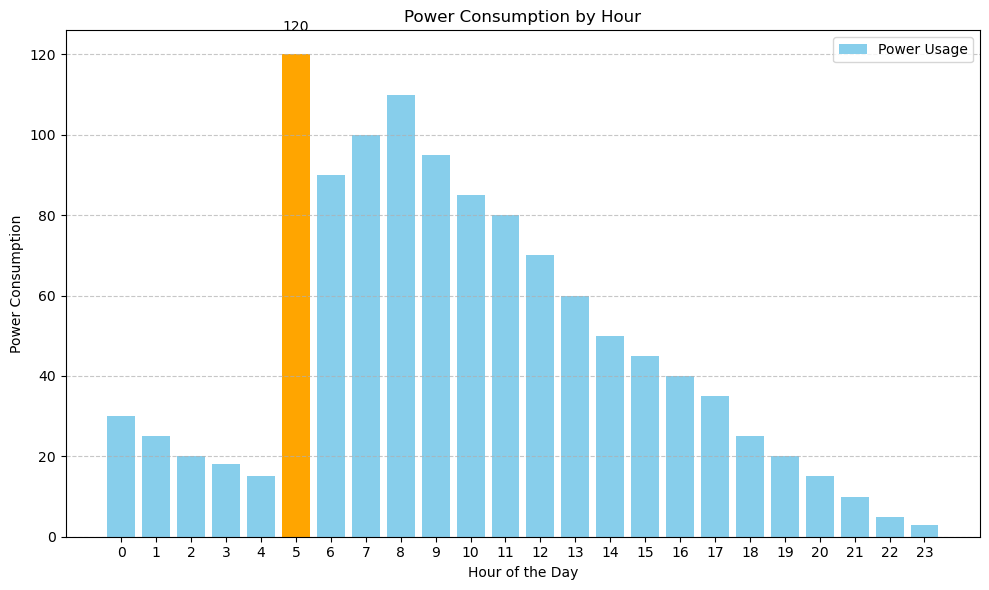

In [105]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace with your actual data)
data = {
    'hour': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
    'power': [30, 25, 20, 18, 15, 120, 90, 100, 110, 95, 85, 80, 70, 60, 50, 45, 40, 35, 25, 20, 15, 10, 5, 3]
}
df = pd.DataFrame(data)

# Identify peak hour(s)
peak_power = df['power'].max()
peak_hours = df[df['power'] == peak_power]

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(df['hour'], df['power'], color='skyblue', label='Power Usage')

# Highlight the peak hour(s)
for _, row in peak_hours.iterrows():
    plt.bar(row['hour'], row['power'], color='orange', label='Peak Hour(s)' if _ == 0 else '')

# Adding labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Power Consumption')
plt.title('Power Consumption by Hour')
plt.xticks(range(0, 24))  # Show all hours on the x-axis
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating the peak hour(s)
for _, row in peak_hours.iterrows():
    plt.text(row['hour'], row['power'] + 5, f"{int(row['power'])}", ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


This code creates a bar chart to visualize the power consumption by hour of the day. It highlights the peak power consumption hour(s) in orange, with a label showing the power value at the peak. The x-axis represents the hours of the day (0 to 23), and the y-axis represents the power consumption. Additionally, it annotates the peak hour(s) with their respective power values for better clarity. The grid and legend enhance the readability of the plot. The peak hour(s) are identified by finding the maximum power value in the dataset and then isolating the corresponding hours.

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' contains the data with 'power' and 'hour' columns
average_power = df.groupby('hour')['power'].mean()

# Display the average power for each hour
print(average_power)


hour
0      30.0
1      25.0
2      20.0
3      18.0
4      15.0
5     120.0
6      90.0
7     100.0
8     110.0
9      95.0
10     85.0
11     80.0
12     70.0
13     60.0
14     50.0
15     45.0
16     40.0
17     35.0
18     25.0
19     20.0
20     15.0
21     10.0
22      5.0
23      3.0
Name: power, dtype: float64


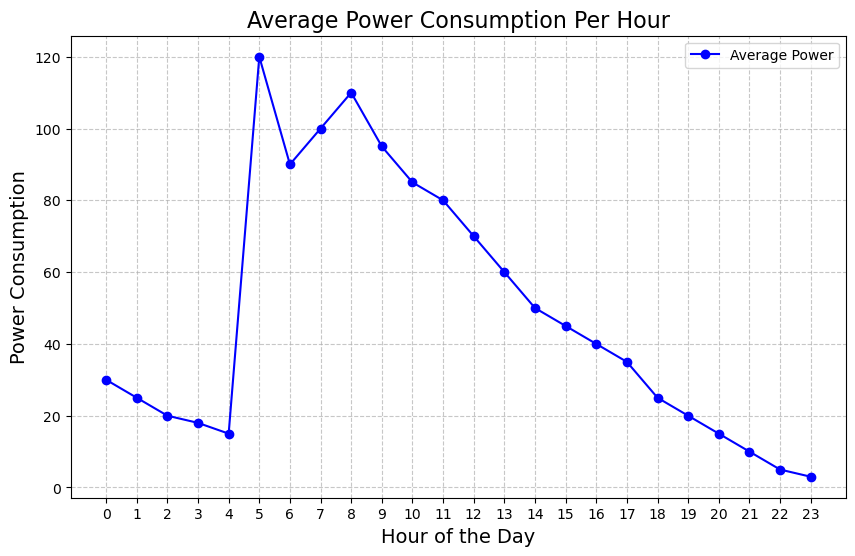

In [107]:
# Plot the average power consumption per hour
plt.figure(figsize=(10, 6))
plt.plot(average_power.index, average_power.values, marker='o', linestyle='-', color='b', label='Average Power')
plt.title('Average Power Consumption Per Hour', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Power Consumption', fontsize=14)
plt.xticks(range(0, 24))  # Ensure all hours are labeled on the x-axis
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


The code calculates the average power consumption for each hour of the day by grouping the data based on the 'hour' column and computing the mean of the 'power' values. It then visualizes this average power consumption using a line plot, where each point on the line represents the average power for a specific hour. The plot is customized with markers at each data point, a grid for better readability, and labels for both axes, including a title and legend. The x-axis is set to display all 24 hours, and the graph helps visualize how power consumption fluctuates throughout the day.

Peak hour (highest average power): 5
Lowest hour (lowest average power): 23


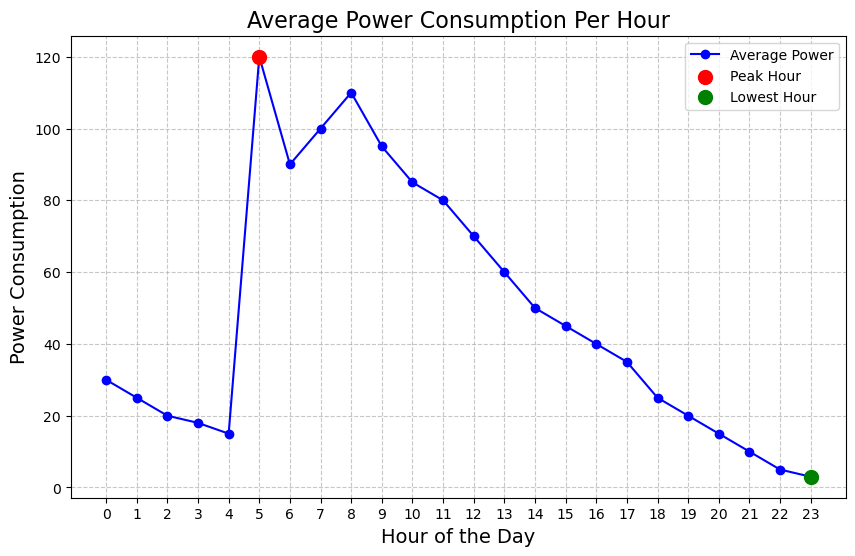

In [108]:
# Find hours with the highest and lowest average power
peak_hour = average_power.idxmax()
lowest_hour = average_power.idxmin()

print(f"Peak hour (highest average power): {peak_hour}")
print(f"Lowest hour (lowest average power): {lowest_hour}")

# Highlight these on the plot
plt.figure(figsize=(10, 6))
plt.plot(average_power.index, average_power.values, marker='o', linestyle='-', color='b', label='Average Power')
plt.scatter(peak_hour, average_power[peak_hour], color='r', s=100, label='Peak Hour', zorder=5)
plt.scatter(lowest_hour, average_power[lowest_hour], color='g', s=100, label='Lowest Hour', zorder=5)
plt.title('Average Power Consumption Per Hour', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Power Consumption', fontsize=14)
plt.xticks(range(0, 24))  # Ensure all hours are labeled on the x-axis
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


In [109]:
# Assuming you have a DataFrame with columns like 'temperature', 'voltage', 'current' and a target column 'defective' (1 or 0)
# Adjust as per your actual dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Example columns (adjust as needed)
X = data[['temperature', 'voltage', 'current']]  # Feature columns
y = data['defective']  # Target variable (defective: 1, non-defective: 0)

# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Standardize the features (important for models like SVM, Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


TypeError: unhashable type: 'list'

In [112]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'trained_model.pkl')

print("Model saved as 'trained_model.pkl'")


Model saved as 'trained_model.pkl'


In [111]:
git clone https://github.com/NaveenKrishna0312/energy_app.git
cd energy_app



SyntaxError: invalid syntax (3645385433.py, line 1)

In [113]:
pip install django



     ---------------------------------------- 8.0/8.0 MB 39.3 MB/s eta 0:00:00
  Using cached asgiref-3.8.1-py3-none-any.whl (23 kB)
     ---------------------------------------- 44.4/44.4 kB ? eta 0:00:00
     ------------------------------------- 346.8/346.8 kB 22.4 MB/s eta 0:00:00


In [114]:
django-admin startproject energy_dashboard


SyntaxError: invalid syntax (3406514173.py, line 1)

In [ ]:
cd energy_dashboard


In [115]:
!django-admin startproject energy_dashboard


In [116]:
!python manage.py startapp energy_app


python: can't open file 'C:\Users\Naveen\manage.py': [Errno 2] No such file or directory


In [117]:
pip install flask


Note: you may need to restart the kernel to use updated packages.


In [119]:
from flask import Flask, request, render_template
import pickle
import numpy as np

# Initialize the Flask app
app = Flask(__name__)

# Load your trained ML model (assuming it is saved as 'model.pkl')
model = pickle.load(open('trained_model.pkl', 'rb'))  # Adjust the file name as needed

@app.route('/')
def home():
    return render_template('index.html')  # Create an HTML file to handle input and output

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get input from the form (make sure to handle form fields correctly)
        temperature = float(request.form['temperature'])
        voltage = float(request.form['voltage'])
        current = float(request.form['current'])
        
        # Prepare input for prediction (ensure this matches your model's input format)
        input_data = np.array([[temperature, voltage, current]])
        
        # Make prediction
        prediction = model.predict(input_data)
        
        # Return prediction to user (adjust this part to show results in a user-friendly way)
        return render_template('index.html', prediction_text=f'Predicted Defectiveness: {prediction[0]}')
    
    except Exception as e:
        return str(e)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\Naveen\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [121]:
!python app.py


python: can't open file 'C:\Users\Naveen\app.py': [Errno 2] No such file or directory


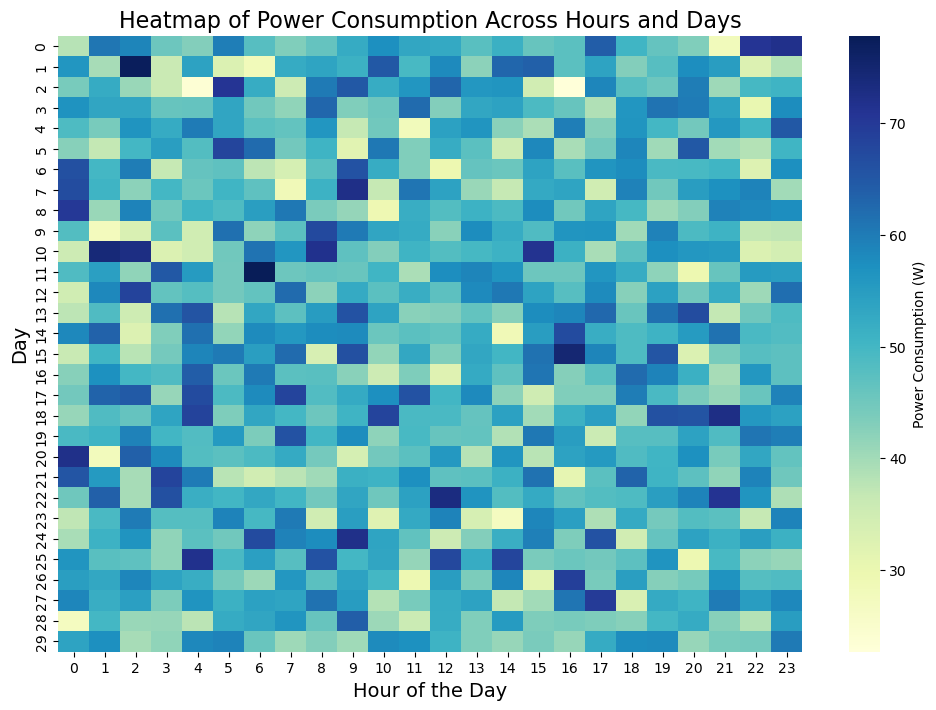

In [122]:
import seaborn as sns
# Assuming you have a DataFrame with power data for multiple days
power_data = np.random.normal(50, 10, (30, 24))  # Simulated for 30 days, 24 hours
power_df = pd.DataFrame(power_data, columns=range(24))

plt.figure(figsize=(12, 8))
sns.heatmap(power_df, cmap="YlGnBu", cbar_kws={'label': 'Power Consumption (W)'})
plt.title('Heatmap of Power Consumption Across Hours and Days', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Day', fontsize=14)
plt.show()


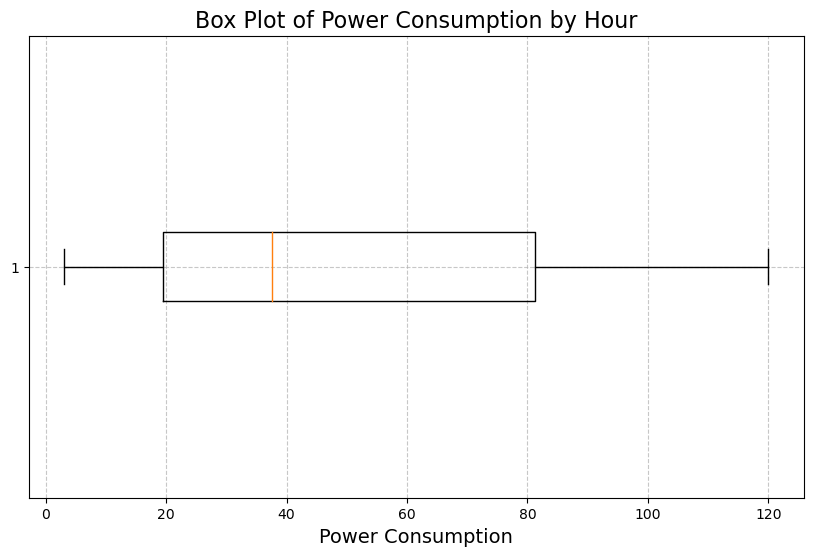

In [123]:
plt.figure(figsize=(10, 6))
plt.boxplot(average_power.values, vert=False)
plt.title('Box Plot of Power Consumption by Hour', fontsize=16)
plt.xlabel('Power Consumption', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


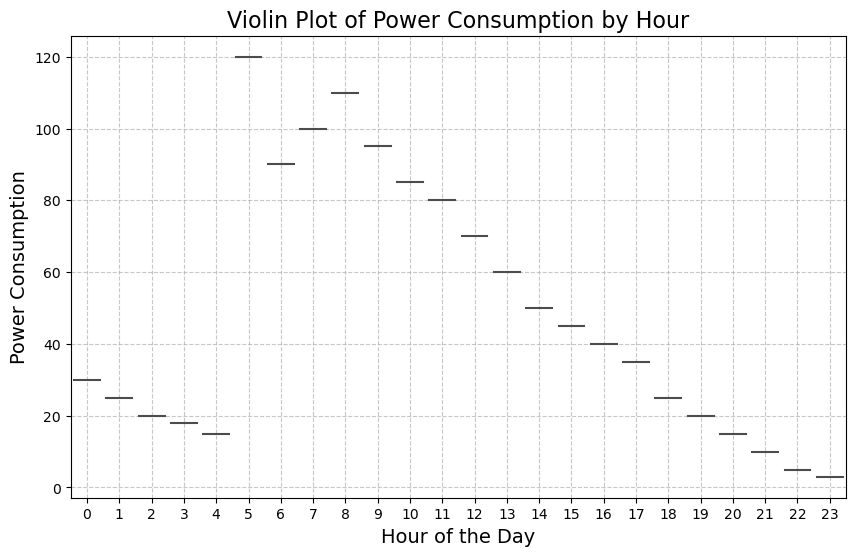

In [124]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=average_power.index, y=average_power.values, color='b')
plt.title('Violin Plot of Power Consumption by Hour', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Power Consumption', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


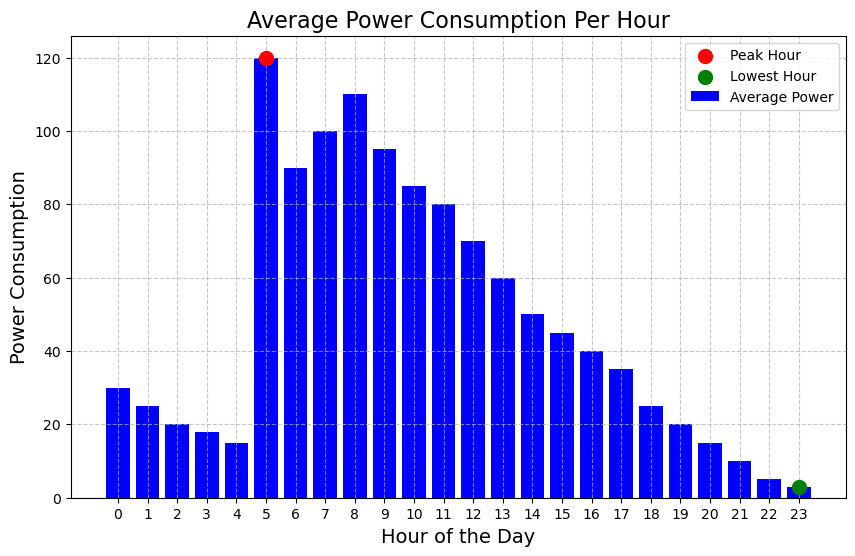

In [125]:
plt.figure(figsize=(10, 6))
plt.bar(average_power.index, average_power.values, color='b', label='Average Power')
plt.scatter(peak_hour, average_power[peak_hour], color='r', s=100, label='Peak Hour', zorder=5)
plt.scatter(lowest_hour, average_power[lowest_hour], color='g', s=100, label='Lowest Hour', zorder=5)
plt.title('Average Power Consumption Per Hour', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Power Consumption', fontsize=14)
plt.xticks(range(0, 24))  # Ensure all hours are labeled on the x-axis
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()
